In [2]:
import pandas as pd

In [3]:
import io
r_df = pd.read_csv('ratings.csv')
print(r_df.shape)

(100836, 4)


In [4]:
m_df = pd.read_csv('movies.csv')
print(m_df.shape)

(9742, 3)


In [5]:
r_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
unique = r_df['userId'].nunique()
print(unique)

610


In [7]:
dfm = pd.merge(r_df, m_df, on='movieId')

c = dfm.groupby('movieId')['rating'].count()

maxi= c.idxmax()

maxt = m_df[m_df['movieId'] == maxi]['title'].iloc[0]

print({maxt})

{'Forrest Gump (1994)'}


In [8]:
import pandas as pd
t_df = pd.read_csv('tags.csv')


In [9]:
id1 = 2571
t = t_df[t_df['movieId'] == id1]['tag']

print(t.unique())

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [10]:
terminator= m_df[m_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

ratings = r_df[r_df['movieId'] == terminator]

avg= ratings['rating'].mean()

print(avg)

3.970982142857143


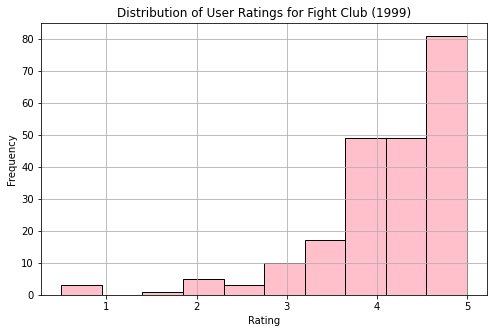

In [11]:
import matplotlib.pyplot as plt
f_id = m_df[m_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]
f_r = r_df[r_df['movieId'] == f_id]
plt.figure(figsize=(8, 5))
plt.hist(f_r['rating'], bins=10, color='pink', edgecolor='black')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
group = r_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
group.columns = ['movieId', 'rating_count', 'rating_mean']
mer = pd.merge(m_df, group, on='movieId', how='inner')

fdf = mer[mer['rating_count'] > 50]

res = fdf[fdf['rating_mean'] == fdf['rating_mean'].max()]

print(res[['title', 'rating_mean']])


                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [13]:
t5 = fdf.sort_values(by='rating_count', ascending=False).head(5)

print(t5[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [22]:
x = fdf[fdf['genres'].str.contains('Sci-Fi')]
y = x.sort_values(by='rating_count', ascending=False)
res = y.iloc[2]
print(res[['title', 'rating_count']])



title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object
